# A Variation on the SIR Macro Model - ECON 407 Final Project

>**Author**
   - **Sheldon Birkett**
   - *Note: Code in this Notebook may take a bit of time to process.*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats

## Introduction 1.0

For this project I am providing an extension on [Eichenbaum, Rebelo, and Trabandt, 2020](https://www.nber.org/papers/w26882) paper **The Macroeconomics of Epidemics**. The major change to this model I propose to make is to have the probability of becoming infected while shopping $\pi_1$, the probability of becoming infected as a result of work interactions $\pi_2$, and the probability of becoming infected as a result of other activities (e.g. meeting a neighbour or having family over for the holiday) $\pi_3$, to vary with the fraction of individuals who are vaccinated once inoculations begin at time $t^*$. That is $\pi_{k,t}$ for $k={1,2,3}$ and time $t \geq t^*$ will follow:

$$\pi_{k,t+1} = \pi_{k,t} - \nu S_t $$

Where $\nu$ is the fraction of individuals who are susceptible to the virus that are vaccinated every period for $t \geq t^*$. In <strong data-cite="eichenbaum2020">(Eichenbaum, Rebelo, and Trabandt, 2020)</strong> model they assumed that at the time the vaccine is available $t^*$ the number of susceptible $S_{t^*}^\prime$ and recovered people $R_{t^*}^\prime$ is $S_{t^*}^\prime = 0$ and $R_{t^*}^\prime = R_{t^*}+S_{t^*}$. The assumption that $S_{t^*}^\prime=0$, once inoculations begin, is not realistic because such a mass vaccination program will take months before a significant portion of the population is vaccinated such that nobody is susceptible to the virus. Simulating how the pandemic will play out during a mass vaccination program is critical to understanding how long economic support measures and public health restrictions will have to remain in place, and the macroeconomic implications of such measures. I will also relax the assumption that labour productivity for susceptible and recovered individuals is $\phi^s = \phi^r = 1$. This assumption does not seem realistic in the world of online working because people may be dealing with negative mental health effects due to isolation even if they are not infected. It would also be interesting to look at how the optimal containment policy $\mu_t$, as represented by a tax on consumption in <strong data-cite="eichenbaum2020">(Eichenbaum, Rebelo, and Trabandt, 2020)</strong>, changes when inoculations of the vaccine begin (e.g. variation of a Ramsey problem). Solving the Ramsey problem would be a great extension to this project.

## Pre-Epidemic Model 1.1

As described in <strong data-cite="eichenbaum2020">(Eichenbaum, Rebelo, and Trabandt, 2020)</strong> all agents are identical prior to the pandemic and maximize:

$$ U = \sum_{t=0}^{\infty} \beta^t u(c_t, n_t)$$

Where $c_t$ and $n_t$ denote consumption and hours worked respectively and $\beta \in (0,1)$ denotes the discount factor. For simplicity I assume the same concave utility as in <strong data-cite="eichenbaum2020">(Eichenbaum, Rebelo, and Trabandt, 2020)</strong>:

$$ u(c_t,n_t) = \ln c_t - \frac{\theta}{2} n_t^2$$

With the budget constraint of the representative agent as: 

$$(1+\mu_t)c_t = w_t n_t + \Gamma_t $$

$\theta$ represents the disutility of labour from working, $w_t$ is the real wage rate, $\mu_t$ is the tax rate on consumption and can be thought as a proxy for containment measures, and $\Gamma_t$ is the lump-sum transfers from the government.

There is a continuum of competitve representative firms that produce consumption goods $C_t$ using hours worked $N_t$ according to technology: 

$$ C_t = AN_t $$

The firm chooses hours worked to maximize its time-$t$ profits $\Pi_t$:

$$\Pi_t = AN_t - w_tN_t $$ 

The government's budget constraint is given by: 

$$\mu_t c_t = \Gamma_t $$

In addition, I will assume labour $n_t$, and therefore production, is stochastic in this model such that consumers prior to the pandemic are maximizing: 

$$ \max_{c_t} \mathbb{E}  \left[ \sum_{t=0}^{\infty} \beta^t u(c_t, n_t) \right]$$

Stochastic labour helps model the unpredictability of the pandemic labour market. In addition, this assumption seems reasonable as consumers most likely do not have perfect foresight about their employment.

## The Pandemic Model - Baseline Model 1.2 

The pandemic model evolves according to the following transition matrix (organized as $S_t, I_t, R_t, D_t$ down the rows): 


$$
P = \left(
\begin{array}{cccc}
    1 - (\pi_1 (C_t^s) (I_t C_t^i) + \pi_2 (N_t^s)(I_t N_t^i) + \pi_3 (I_t)) & \pi_1 (C_t^s) (I_t C_t^i) + \pi_2 (N_t^s)(I_t N_t^i) + \pi_3 (I_t) & 0 & 0 \\
    0 & 1-(\pi_r + \pi_d) & \pi_r & \pi_d \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1  
\end{array}
\right)
$$

where $T_t$ is the number of newly infected people, which equals: 

$$ T_t = \pi_1 (S_t C_t^s) (I_t C_t^i) + \pi_2 (S_t N_t^s)(I_t N_t^i) + \pi_3 (S_tI_t) $$

   - $\pi_1$ probability of becoming infected due to shopping, where $(S_t C_t^s) (I_t C_t^i)$ is the total consumption expenditure by susceptible and infected people. 
   - $\pi_2$ probability of becoming infected at work, where $(S_t N_t^s)(I_t N_t^i)$ is the total number of hours worked by susceptibe and infected people. 
   - $\pi_3$ probability of becoming infected from other activities (not directly related to consumption and working), where $(S_tI_t)$ is the number of random meetings between infected and suceptible people. 
   - $S_t$ Fraction of people susceptible to the virus. 
   - $I_t$ Fraction of people infected
   - $R_t$ Fraction of people recovered (cannot become infected again!). 
   - $D_t$ Fraction of people that are dead. 
   - $\pi_r$ is the rate at which infected people recover. 
   - $\pi_d$ is the mortality rate.
   
At $t=0$ there are $I_0 = \epsilon$ people infected and $S_0 = 1 - \epsilon$ people susceptible. 

The budget constraint follows for type-$j$ agent (where $j = s, i , r$): 

$$(1+\mu_t)c_t^j = w_t \phi^j n_t^j + \Gamma_t $$

where $\phi^j$ is the labour productivity parameter of agent $j$, and it is assumed that $1 = \phi^r >\phi^s > \phi^i > 0$ recovered people are more productive than susceptible and infected people because they cannot become infected again. Susceptible people are more productive than infected people because they are not sick/infected, but they still must follow restrictions which will make them slightly less productive than recovered people.

## Lifetime Utility of Susceptible, Infected, and Recovered People For Pandemic Model 1.3

The lifetime utility of a **susceptible person** is: 

$$ U_t^s = u(c_t^s, n_t^s) + \beta \left[ (1- \tau_t) \mathbb{E} U_{t+1}^s + \tau_t \mathbb{E} U_{t+1}^i \right] $$ 

The variable $\tau_t$ represents the probability a susceptible person becomes infected: 

$$ \tau_t = \pi_1 c_t^s (I_tC_t^I) + \pi_2 n_t^s (I_t N_t^I) + \pi_3I_t $$ 

The lifetime utility of an **infected person** is: 

$$ U_t^i = u(c_t^i, c_t^i) + \beta \left[ (1 - \pi_r - \pi_d) \mathbb{E} U_{t+1}^i + \pi_r \mathbb{E}U_{t+1}^r \right] $$

The lifetime utility of a **recovered person** is: 

$$ U_t^r = u(c_t^r, n_t^r) + \beta \mathbb{E}U_{t+1}^r $$ 

The government budget constraint follows: 

$$\mu_t (S_t c_t^s + I_t c_t^i + R_t c_t^r) = \Gamma_t (S_t + I_t + R_t) $$

As mentioned above, the consumer's budget constraint for type-$j$ agent (where, $j = s, i, r $) is: 


$$(1+\mu_t)c_t^j = w_t \phi^j n_t^j + \Gamma_t $$

## Baseline Model Simulation 2.0

### Pre-Epidemic Model 2.1

Before the pandemic the bellman equation takes the following form: 

$$ U(\mu, n) = \max_c \left[ u(c,n) + \beta \mathbb{E} U(\mu^\prime, n^\prime) \right] $$

In [2]:
#parameters, most parameters set from Eichenbaum (2020), except phi_s

beta = 0.96**(1/52)
pi_r = 7/18 - (7*0.005)/18
pi_d = (7*0.005)/18
pi_1 = 7.8408*(10**(-8))
pi_2 = 1.2442*(10**(-4))
pi_3 = 0.3901

epsilon = 0.001 
A = 39.835
theta = 0.001275

phi_i = 0.8 
phi_r = 1
phi_s = 0.95

In [3]:
#utility function
def u(c, n): 
    if (c < 0): 
        return -1e10
    else: 
        return np.log(c)-(theta/2)*n**2

In [4]:
#production function 
def C(A, n): 
    return A*n

In [5]:
#make a grid of taxes 
mu_n = 100
mu_min = 0 
mu_max = 0.2
mu_grid = np.linspace(mu_min, mu_max, mu_n)

In [6]:
#make a grid for different levels of employment
n_g = 3 
n_grid = np.array([0.1, 0.3, 0.6])
M = np.array([[0.8, 0.15, 0.05], [0.1, 0.8, 0.1], [0.05, 0.15, 0.8]])

In [7]:
%%time 

T = 100

V = np.zeros((T, n_g, mu_n))
policy = np.zeros((n_g, mu_n))
consumption = np.zeros((n_g, mu_n))

for i in range(T-1):
    for j in range(n_g):
        for m in range(mu_n):
            V[i + 1, j, m] = -1e10
            for m_p in range(mu_n):
                c = C(A, n_grid[j])
                tmp = u(c, n_grid[j]) + beta * np.dot(M[j, :], V[i,:, m_p])
            if (tmp > V[i+1, j, m]):
                V[i + 1, j, m] = tmp
                policy[j, m] = mu_grid[m_p]
                consumption[j, m] = C(A, n_grid[j])

Wall time: 47 s


In [8]:
consumption_base = consumption
V_base = V

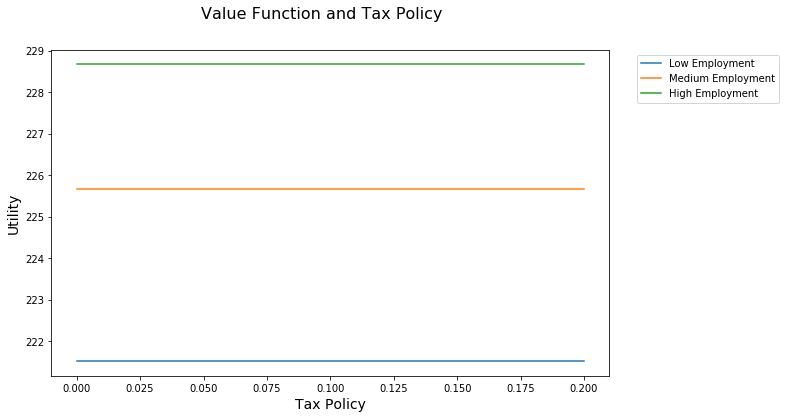

In [9]:
plt.figure(figsize = (10,6))
plt.plot(mu_grid, V[T-1,0,:].T, label = "Low Employment")
plt.plot(mu_grid, V[T-1,1,:].T, label = "Medium Employment")
plt.plot(mu_grid, V[T-1,2,:].T, label = "High Employment")
plt.suptitle("Value Function and Tax Policy", fontsize = 16)
plt.ylabel("Utility", fontsize = 14)
plt.xlabel("Tax Policy", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

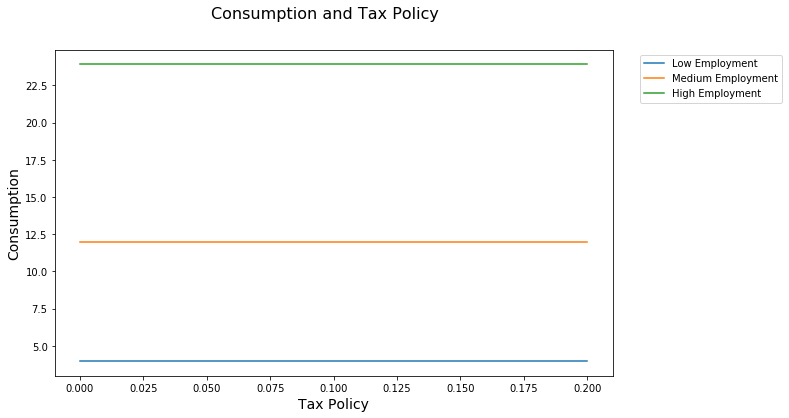

In [10]:
plt.figure(figsize = (10,6))
plt.plot(mu_grid, consumption[0,:].T, label = "Low Employment")
plt.plot(mu_grid, consumption[1,:].T, label = "Medium Employment")
plt.plot(mu_grid, consumption[2,:].T, label = "High Employment")
plt.suptitle("Consumption and Tax Policy", fontsize = 16)
plt.ylabel("Consumption", fontsize = 14)
plt.xlabel("Tax Policy", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

In the pre-pandemic model consumption and the value function do not change with the given tax policy since all taxes collected are returned to consumers in the form of lump-sum transfers $\Gamma_t$ each period.

## Basic SIR Simulation 2.2

In [11]:
#intial SIRD values
SIRD = np.array([1-epsilon, epsilon, 1e-10, 1e-10])

In [12]:
def SIRD_model_basic(ini_dist, T, pi_r, pi_d, pi_3):
    n = len(ini_dist)
    result = np.zeros((T,n))
    result[0,:] = ini_dist
    for i in range(T-1):
        P = np.array([[1-pi_3*result[i,1], pi_3*result[i,1], 0, 0], 
                      [0, 1-pi_r-pi_d, pi_r, pi_d],
                      [0,0, 1, 0], 
                      [0,0,0,1]])
        result[i+1,:] = np.dot(result[i,:], P)
    
    return result
    

The basic SIR model with $\pi_1 = \pi_2 = 0$ and $\pi_3 = 0.5$. $\pi_3 = 0.5$ simplifies the model as it assumes each infected person would make an infecting contact every two days. This is aligned with the most [basic SIR models](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model).

In [13]:
pi_r, pi_d = 7/18 - (7*0.005)/18, (7*0.005)/18
SIRD_sim_basic = SIRD_model_basic(SIRD, 100, pi_r, pi_d, 0.5)

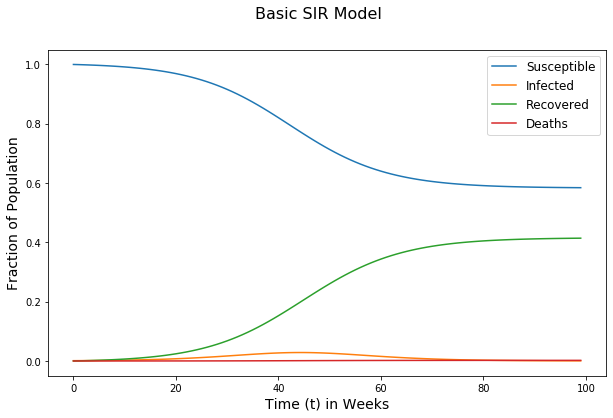

In [14]:
fig = plt.figure(figsize = (10,6))
plt.plot(SIRD_sim_basic[:, 0], label = "Susceptible")
plt.plot(SIRD_sim_basic[:, 1], label = "Infected")
plt.plot(SIRD_sim_basic[:, 2], label = "Recovered")
plt.plot(SIRD_sim_basic[:, 3], label = "Deaths")
plt.suptitle("Basic SIR Model", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.legend(loc = "best", fontsize = "large")
plt.show()

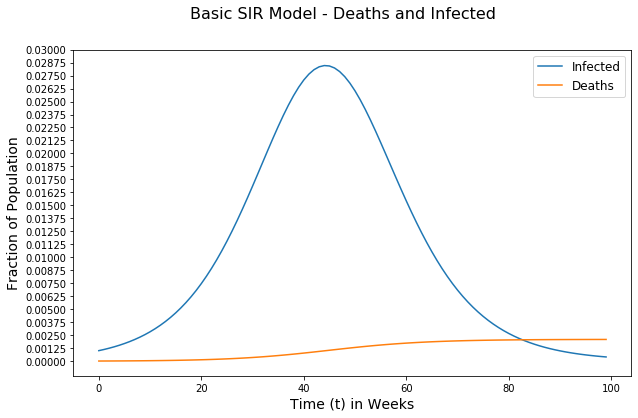

In [15]:
fig = plt.figure(figsize = (10,6))
plt.plot(SIRD_sim_basic[:, 1], label = "Infected")
plt.plot(SIRD_sim_basic[:, 3], label = "Deaths")
plt.suptitle("Basic SIR Model - Deaths and Infected", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
y = np.linspace(0, 0.03, 25)
plt.yticks(y)
plt.legend(loc = "best", fontsize = "large")
plt.show()

In [16]:
US_pop = 331_000_000
Max_infected = max(SIRD_sim_basic[:, 1]) * US_pop
Max_deaths = max(SIRD_sim_basic[:, 3]) * US_pop
print(f"At the peak of infection at week {np.argmax(SIRD_sim_basic[:, 1])} there are around {Max_infected:.0f} people infected in the United States.")
print(f"This resulted in {Max_deaths:.0f} deaths by the end of the epidemic at week {np.argmax(SIRD_sim_basic[:, 3])}.")

At the peak of infection at week 44 there are around 9422199 people infected in the United States.
This resulted in 688147 deaths by the end of the epidemic at week 99.


This model shows us that a small number of infections has a big impact on the number of people who are susceptible and recovered. Keep in mind that the values on the y axis get very large when there is a large population as shown in the calculations above taking the United States population as given at 331 million. 

## Basic SIR Simulation with Vaccination 2.3

Vaccination $\pi_{k,t+1} = \pi_{k,t} - \nu S_t$ for $k={3}$ at time $t \geq t^*$.

In [17]:
def SIRD_model_vaccination(ini_dist, T, pi_r, pi_d, pi_3, v, t):
    
    n = len(ini_dist)
    result = np.zeros((T,n))
    result[0,:] = ini_dist

    pi_3t = np.zeros(T-t)
    vacc = np.zeros(T)
    
    pi_3t[0] = pi_3
    
    x = 0
    for i in range(T-1):
        if i < t:
            
            P = np.array([[1-pi_3*result[i,1], pi_3*result[i,1], 0, 0], 
                          [0, 1-(pi_r+pi_d), pi_r, pi_d],
                          [0,0, 1, 0], 
                          [0,0,0,1]])
            
            result[i+1, :] = result[i,:] @ P
            vacc[i+1] = vacc[i]
            
        else: 
            pi_3t[x+1] = pi_3t[x]-v*result[i,0]
            vacc[i+1] = vacc[i] + v*result[i,0]
            
            P = np.array([[1-pi_3t[x]*result[i,1], pi_3t[x]*result[i,1], 0, 0],
                          [0, 1-(pi_r+pi_d), pi_r, pi_d],
                          [0,0, 1, 0],
                          [0,0,0,1]])
            
            result[i+1, :] = np.dot(result[i,:], P)
            
            x = x+1
    
    return result, vacc

In [18]:
pi_r, pi_d, v, t = 7/18 - (7*0.005)/18, (7*0.005)/18, 0.001, 10
SIRD_sim_basic_vacc = SIRD_model_vaccination(SIRD, 100, pi_r, pi_d, 0.5,v,t)

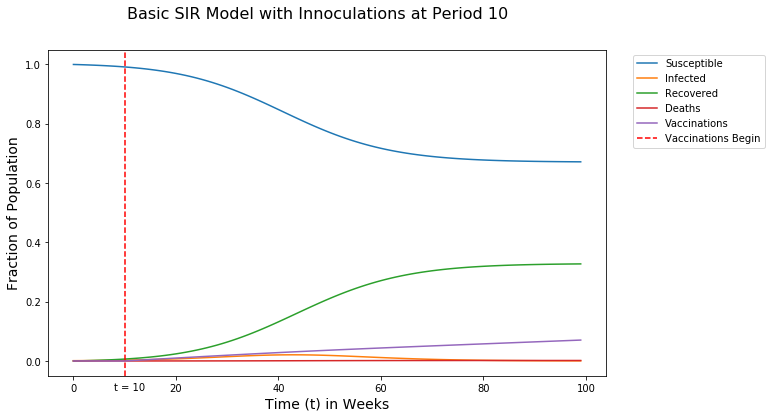

In [19]:
fig = plt.figure(figsize = (10,6))
plt.plot(SIRD_sim_basic_vacc[0][:, 0], label = "Susceptible")
plt.plot(SIRD_sim_basic_vacc[0][:, 1], label = "Infected")
plt.plot(SIRD_sim_basic_vacc[0][:, 2], label = "Recovered")
plt.plot(SIRD_sim_basic_vacc[0][:, 3], label = "Deaths")
plt.plot(SIRD_sim_basic_vacc[1][:], label = "Vaccinations")
plt.axvline(x = 10, label = "Vaccinations Begin", color = "r", ls = '--')
fig.suptitle("Basic SIR Model with Innoculations at Period 10", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.text(8,-0.1, "t = 10")
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

In [20]:
Max_infected_v0 = max(SIRD_sim_basic_vacc[0][:, 1]) * US_pop
Max_deaths_v0 = max(SIRD_sim_basic_vacc[0][:, 3]) * US_pop
print(f"With vaccination at week 10, at the peak of infection at week {np.argmax(SIRD_sim_basic_vacc[0][:, 1])} there are around {Max_infected_v0:.0f} people infected in the United States.")
print(f"This resulted in {Max_deaths_v0:.0f} deaths by the end of the epidemic at week {np.argmax(SIRD_sim_basic_vacc[0][:, 3])}.")

With vaccination at week 10, at the peak of infection at week 43 there are around 6886404 people infected in the United States.
This resulted in 543986 deaths by the end of the epidemic at week 99.


In [21]:
pi_r, pi_d, v, t = 7/18 - (7*0.005)/18, (7*0.005)/18, 0.001, 30
SIRD_sim_basic_vacc2 = SIRD_model_vaccination(SIRD, 100, pi_r, pi_d, 0.5, v, t)

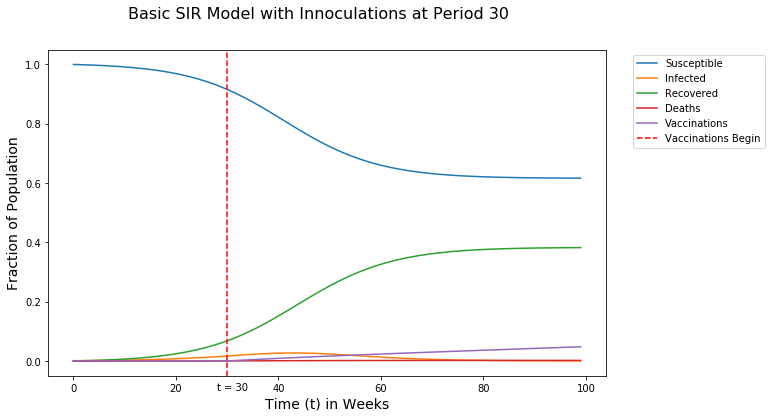

In [22]:
fig = plt.figure(figsize = (10,6))
plt.plot(SIRD_sim_basic_vacc2[0][:, 0], label = "Susceptible")
plt.plot(SIRD_sim_basic_vacc2[0][:, 1], label = "Infected")
plt.plot(SIRD_sim_basic_vacc2[0][:, 2], label = "Recovered")
plt.plot(SIRD_sim_basic_vacc2[0][:, 3], label = "Deaths")
plt.plot(SIRD_sim_basic_vacc2[1][:], label = "Vaccinations")
plt.axvline(x = 30, label = "Vaccinations Begin", color = "r", ls = '--')
fig.suptitle("Basic SIR Model with Innoculations at Period 30", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.text(28,-0.1, "t = 30")
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

In [23]:
Max_infected_v1 = max(SIRD_sim_basic_vacc2[0][:, 1]) * US_pop
Max_deaths_v1 = max(SIRD_sim_basic_vacc2[0][:, 3]) * US_pop
print(f"With vaccination at week 30, at the peak of infection at week {np.argmax(SIRD_sim_basic_vacc2[0][:, 1])} there are around {Max_infected_v1:.0f} people infected in the United States.")
print(f"This resulted in {Max_deaths_v1:.0f} deaths by the end of the epidemic at week {np.argmax(SIRD_sim_basic_vacc2[0][:, 3])}.")

With vaccination at week 30, at the peak of infection at week 43 there are around 8914016 people infected in the United States.
This resulted in 635321 deaths by the end of the epidemic at week 99.


In [24]:
pi_r, pi_d, v, t = 7/18 - (7*0.005)/18, (7*0.005)/18, 0.001, 60
SIRD_sim_basic_vacc3 = SIRD_model_vaccination(SIRD, 100, pi_r, pi_d, 0.5, v, t)

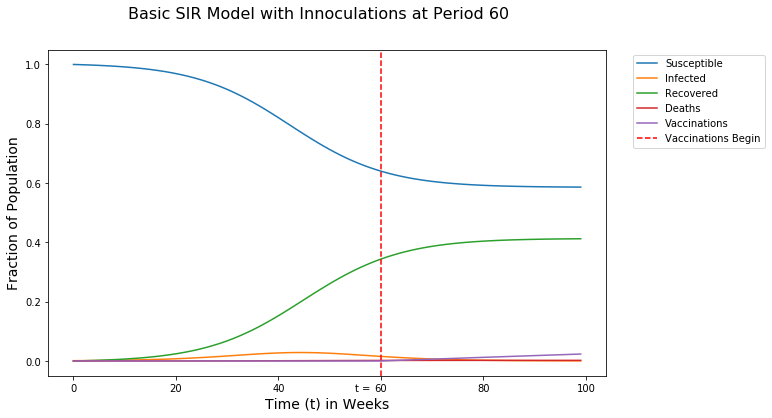

In [25]:
fig = plt.figure(figsize = (10,6))
plt.plot(SIRD_sim_basic_vacc3[0][:, 0], label = "Susceptible")
plt.plot(SIRD_sim_basic_vacc3[0][:, 1], label = "Infected")
plt.plot(SIRD_sim_basic_vacc3[0][:, 2], label = "Recovered")
plt.plot(SIRD_sim_basic_vacc3[0][:, 3], label = "Deaths")
plt.plot(SIRD_sim_basic_vacc3[1][:], label = "Vaccinations")
plt.axvline(x = 60, label = "Vaccinations Begin", color = "r", ls = '--')
fig.suptitle("Basic SIR Model with Innoculations at Period 60", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.text(55,-0.101, "t =")
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

In [26]:
Max_infected_v2 = max(SIRD_sim_basic_vacc3[0][:, 1]) * US_pop
Max_deaths_v2 = max(SIRD_sim_basic_vacc3[0][:, 3]) * US_pop
print(f"With vaccination at week 60, at the peak of infection at week {np.argmax(SIRD_sim_basic_vacc3[0][:, 1])} there are around {Max_infected_v2:.0f} people infected in the United States.")
print(f"This resulted in {Max_deaths_v2:.0f} deaths by the end of the epidemic at week {np.argmax(SIRD_sim_basic_vacc3[0][:, 3])}.")

With vaccination at week 60, at the peak of infection at week 44 there are around 9422199 people infected in the United States.
This resulted in 684945 deaths by the end of the epidemic at week 99.


You can see from the three graphs above that the later vaccinations begin the more people which are in the infected and recovered states, with vaccinations the susceptible people have less of a chance of contracting the virus every period as $\pi_3$ gets smaller (i.e. the probability of a susceptible person catching the virus from an infected person). The fraction of the susceptible people vaccinated every period is $0.1\%$. In the United States this would translate into around 33 million people getting the vaccine per period. This is a very high vaccination rate, which may not be realistic but it helps us understand how a mass vaccination program will affect the outcome of a simulated epidemic. There is a reduction of 49,624 deaths by moving the beginning of vaccinations from week 60 to week 30, and there is a reduction of 140,959 deaths by moving the beginning of vaccination from week 60 to week 10. This suggests that the timing of vaccination is critical to how many total deaths there are at the end of the epidemic. The figures below visualize this effect.

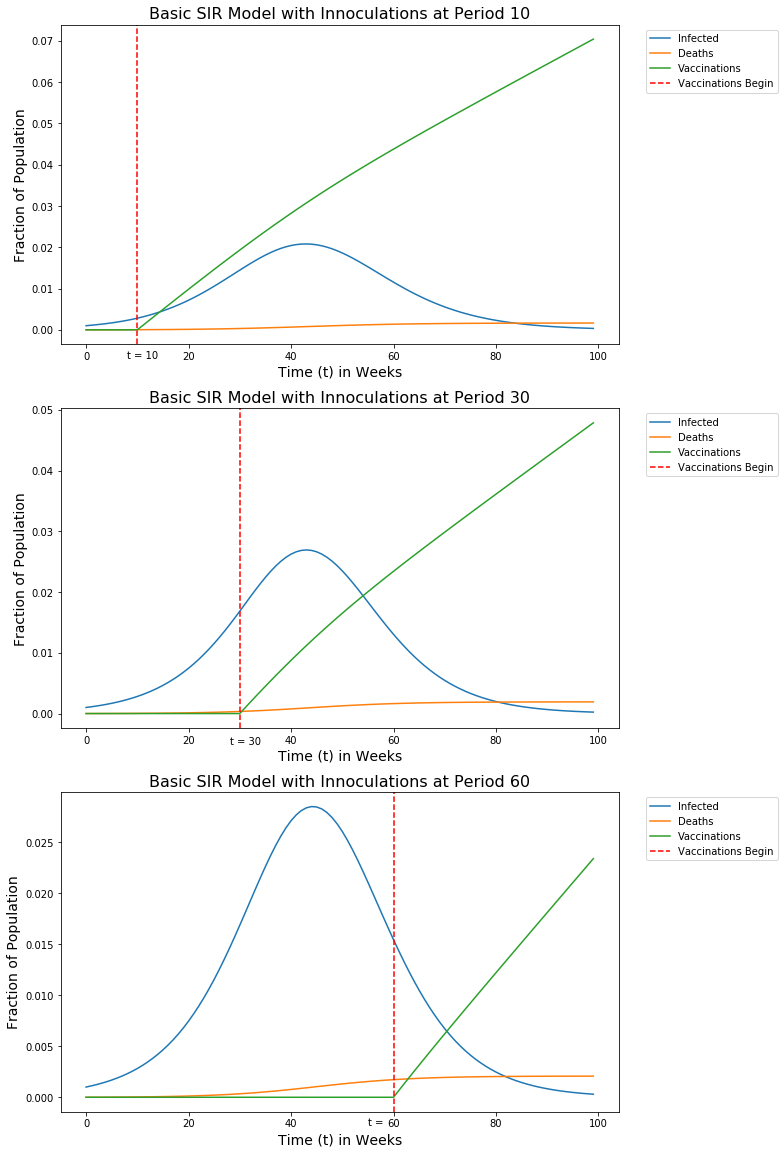

In [27]:
fig, ax = plt.subplots(3,1, figsize = (10,20))
ax[0].plot(SIRD_sim_basic_vacc[0][:, 1], label = "Infected")
ax[0].plot(SIRD_sim_basic_vacc[0][:, 3], label = "Deaths")
ax[0].plot(SIRD_sim_basic_vacc[1][:], label = "Vaccinations")
ax[0].axvline(x = 10, label = "Vaccinations Begin", color = "r", ls = '--')
ax[0].set_title("Basic SIR Model with Innoculations at Period 10", fontsize = 16)
ax[0].set_ylabel("Fraction of Population", fontsize = 14)
ax[0].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[0].text(8,-0.007, "t = 10")
ax[0].legend(bbox_to_anchor = (1.04,1), loc = "upper left")


ax[1].plot(SIRD_sim_basic_vacc2[0][:, 1], label = "Infected")
ax[1].plot(SIRD_sim_basic_vacc2[0][:, 3], label = "Deaths")
ax[1].plot(SIRD_sim_basic_vacc2[1][:], label = "Vaccinations")
ax[1].axvline(x = 30, label = "Vaccinations Begin", color = "r", ls = '--')
ax[1].set_title("Basic SIR Model with Innoculations at Period 30", fontsize = 16)
ax[1].set_ylabel("Fraction of Population", fontsize = 14)
ax[1].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[1].text(28,-0.005, "t = 30")
ax[1].legend(bbox_to_anchor = (1.04,1), loc = "upper left")

ax[2].plot(SIRD_sim_basic_vacc3[0][:, 1], label = "Infected")
ax[2].plot(SIRD_sim_basic_vacc3[0][:, 3], label = "Deaths")
ax[2].plot(SIRD_sim_basic_vacc3[1][:], label = "Vaccinations")
ax[2].axvline(x = 60, label = "Vaccinations Begin", color = "r", ls = '--')
ax[2].set_title("Basic SIR Model with Innoculations at Period 60", fontsize = 16)
ax[2].set_ylabel("Fraction of Population", fontsize = 14)
ax[2].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[2].text(55,-0.0028, "t =")
ax[2].legend(bbox_to_anchor = (1.04,1), loc = "upper left")

plt.show()

## Efficacy of Health Care System 2.4

In the basic SRI model it was assumed that the the healthcare system would not deteriorate with an increased number of infections. To model the deteroriation in the healthcare system I will assume, as did <strong data-cite="eichenbaum2020">(Eichenbaum, Rebelo, and Trabandt, 2020)</strong>, that the mortality rate $\pi_d$ depends on the number of infected people $I_t$: 

$$ \pi_{dt} = \pi_d + \kappa I_t^2 $$

where $\kappa$ is a scaling factor set to 0.9 as in the <strong data-cite="eichenbaum2020">(Eichenbaum, Rebelo, and Trabandt, 2020)</strong> paper. 

In [28]:
def SIRD_model_health_care_efficacy(ini_dist, T, pi_r, pi_d0, pi_1, pi_2, pi_3, v, t, c_s, c_i, n_i, n_s, kappa):
    
    n = len(ini_dist)
    result = np.zeros((T,n))
    result[0,:] = ini_dist

    pi_1t = np.zeros(T-t)
    pi_2t = np.zeros(T-t)
    pi_3t = np.zeros(T-t)
    vacc = np.zeros(T)
    
    pi_d = np.zeros(T)
    
    pi_d[0] = pi_d0
    
    pi_1t[0], pi_2t[0], pi_3t[0] = pi_1, pi_2, pi_3
    
    x = 0
    for i in range(T-1):
        if i < t:
            
            P = np.array([[1-(pi_1*c_s*result[i,1]*c_i+pi_2*n_s*result[i,1]*n_i+pi_3*result[i,1]), pi_1*c_s*result[i,1]*c_i+pi_2*n_s*result[i,1]*n_i+pi_3*result[i,1], 0, 0],
                          [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],
                          [0,0, 1, 0],
                          [0,0,0,1]])
            
            result[i+1, :] = result[i,:] @ P
            
            vacc[i+1] = vacc[i]
            
        else: 
            
            pi_3t[x+1] = pi_3t[x]-v*result[i,0]
            vacc[i+1] = vacc[i] + v*result[i,0]
        
            P = np.array([[1-(pi_3t[x]*result[i,1]), pi_3t[x]*result[i,1], 0, 0],
                          [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],
                          [0,0, 1, 0],
                          [0,0,0,1]])
            
            result[i+1, :] = np.dot(result[i,:], P)
            
            x = x+1
            
        pi_d[i+1] = pi_d[i] + kappa*(result[i,1])**2
    
    return result, vacc

In [29]:
v = 0.001 #fraction of population vaccinated every period
t = 90 # time vaccination begins
kappa = 0.9 #scaling factor for health care efficacy
pi_d0 = (7*0.005)/18
c_s, c_i, n_i, n_s = 0, 0, 0, 0
pi_r = 7/18 - (7*0.005)/18
SIRD_model_health_care_res = SIRD_model_health_care_efficacy(SIRD, 100, pi_r, pi_d0, 0, 0, 0.5, v, t, c_s, c_i, n_i, n_s, kappa)

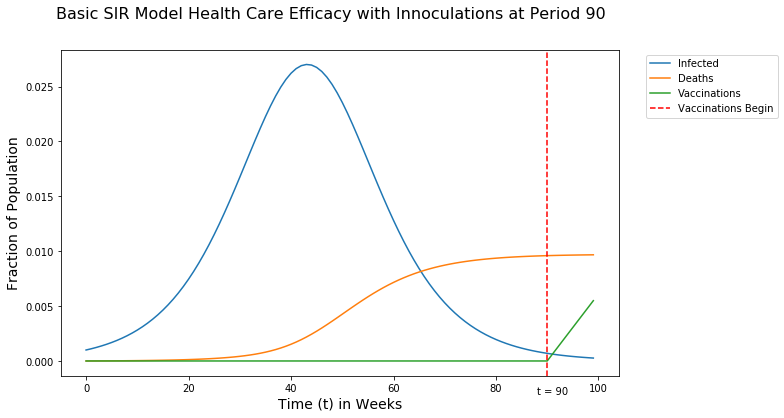

In [30]:
fig = plt.figure(figsize = (10,6))
plt.plot(SIRD_model_health_care_res[0][:, 1], label = "Infected")
plt.plot(SIRD_model_health_care_res[0][:, 3], label = "Deaths")
plt.plot(SIRD_model_health_care_res[1][:], label = "Vaccinations")
plt.axvline(x = 90, label = "Vaccinations Begin", color = "r", ls = '--')
fig.suptitle("Basic SIR Model Health Care Efficacy with Innoculations at Period 90", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.text(88,-0.003, "t = 90")
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

In [31]:
Max_death_health = max(SIRD_model_health_care_res[0][:, 3])*US_pop
Max_infection = max(SIRD_model_health_care_res[0][:, 1])*US_pop
Max_infected = max(SIRD_sim_basic[:, 1]) * US_pop

print(f"This resulted in {Max_death_health:.0f} deaths in comparison to {Max_deaths:.0f} deaths in the basic SIR model given the population size of the United States.")
print(f"This resulted in {Max_infection:.0f} infections at the peak of the epidemic in comparison to {Max_infected:.0f} in the basic SIR model given the population size of the United States.")

This resulted in 3201129 deaths in comparison to 688147 deaths in the basic SIR model given the population size of the United States.
This resulted in 8940237 infections at the peak of the epidemic in comparison to 9422199 in the basic SIR model given the population size of the United States.


We can see with a late period of vaccincations under the health care efficacy model the death rate dramatically increases when infections begin. This will alter the lifetime utility of being infected as there is a higher mortality rate with an inadequte health care system.

## SIR Macro Model - No Vaccinations 3.0

This is the SRI Macro Model with health care efficacy and no vaccinations. The lifetime utility assumed are the same as those outlined in section 1.3.

In [32]:
#make a grid for different levels of employment for susceptible
n_g_s = 3 
n_grid_s = np.array([0.1, 0.3, 0.6])
M = np.array([[0.8, 0.15, 0.05], [0.1, 0.8, 0.1], [0.05, 0.15, 0.8]])

#make a grid for different levels of employment for infected
n_g_i = 3 
n_grid_i = np.array([0.1, 0.3, 0.6])


#make a grid for different levels of employment for recovered
n_g_r = 3 
n_grid_r = np.array([0.1, 0.3, 0.6])

In [33]:
T = 100

pi_1 = 7.8408*(10**(-8))
pi_2 = 1.2442*(10**(-4))
pi_3 = 0.5
pi_d0 = (7*0.005)/18
kappa = 0.9


ini_dist = SIRD
n = len(ini_dist)
result = np.zeros((T,n))

phi_i = 0.8
phi_s = 0.9
phi_r = 1

pi_d = np.zeros(T)
pi_d[0] = pi_d0

V_s = np.zeros((T, n_g_s, mu_n))
V_i = np.zeros((T, n_g_i, mu_n))
V_r = np.zeros((T, n_g_r, mu_n))
#policy = np.zeros((n_g, mu_n))

consumption_s = np.zeros((n_g, mu_n))
consumption_i = np.zeros((n_g, mu_n))
consumption_r = np.zeros((n_g, mu_n))
consumption = np.zeros((n_g, mu_n))


for i in range(T-1):
    for j in range(n_g):
        for m in range(mu_n):
            V_s[i + 1, j, m] = -1e10
            V_i[i + 1, j, m] = -1e10
            V_r[i + 1, j, m] = -1e10
            for m_p in range(mu_n):
                result[0,:] = ini_dist
                c_s = C(A, n_grid_s[j])*phi_s
                tmp_s = u(c_s, n_grid_s[j]) + beta * ((1-result[i,0])*np.dot(M[j, :], V_s[i,:, m_p]) + result[i,0]*np.dot(M[j, :], V_i[i,:, m_p]))
                c_i = C(A, n_grid_s[j])*phi_i
                tmp_i = u(c_i, n_grid_i[j]) + beta *((1-pi_r-pi_d[i])*np.dot(M[j, :], V_i[i,:, m_p]) + pi_r*np.dot(M[j, :], V_r[i,:, m_p]))
                c_r = C(A, n_grid_r[j])*phi_r
                tmp_r = u(c_r, n_grid_r[j]) + beta*np.dot(M[j, :], V_r[i,:, m_p])
                
                
            if (tmp_s > V_s[i+1, j, m]):
                V_s[i + 1, j, m] = tmp_s
                #policy[j, m] = mu_grid[m_p]
                consumption_s[j, m] = C(A, n_grid_s[j])*phi_s
                
            if (tmp_i > V_i[i+1, j, m]):
                V_i[i + 1, j, m] = tmp_i
                #policy[j, m] = mu_grid[m_p]
                consumption_i[j, m] = C(A, n_grid_i[j])*phi_i
                
            if (tmp_r > V_r[i+1, j, m]):
                V_r[i + 1, j, m] = tmp_r
                #policy[j, m] = mu_grid[m_p]
                consumption_r[j, m] = C(A, n_grid_r[j])*phi_r
                
            consumption[j,m] = consumption_s[j, m] + consumption_i[j, m] + consumption_r[j, m]
            
            P = np.array([[1-(pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1]), pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1], 0, 0], [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],[0,0, 1, 0], [0,0,0,1]])
            result[i+1, :] = result[i,:] @ P
            pi_d[i+1] = pi_d[i] + kappa*(result[i,1])**2

In [34]:
V_s_no_vacc = V_s #use for last visualization

In [35]:
result_sir_macro_base = result

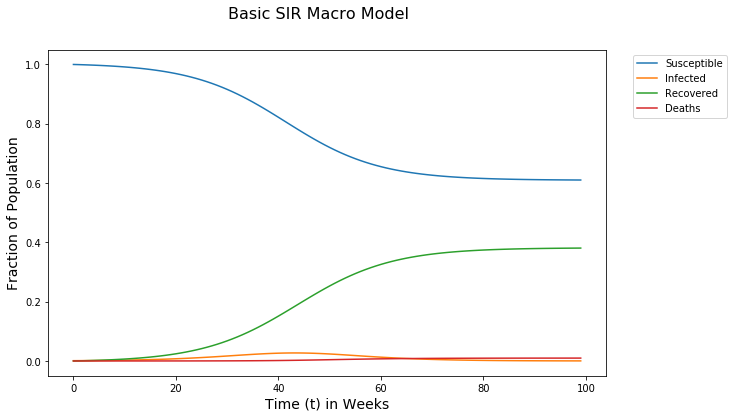

In [36]:
fig = plt.figure(figsize = (10,6))
plt.plot(result[:, 0], label = "Susceptible")
plt.plot(result[:, 1], label = "Infected")
plt.plot(result[:, 2], label = "Recovered")
plt.plot(result[:, 3], label = "Deaths")
plt.suptitle("Basic SIR Macro Model", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

In [37]:
Max_macro_SRI = max(result[:, 1])*US_pop
Max_macro_SRI_deaths = max(result[:, 3])*US_pop
print(f"The maximum number of infections (at peak of epidemic) in the basic SIR Macro Model is {Max_macro_SRI:.0f} compared to the maximum number of infections under the basic SIR model of {Max_infected:.0f}. This is a difference of {Max_infected - Max_macro_SRI:.0f} less people infected in the SRI Macro Model.")
print(f"The maximum number of infections in the basic SIR Macro Model occurred at {np.argmax(result[:, 1])}, and the maximum number of infections in the basic SIR occurred at {np.argmax(SIRD_sim_basic[:, 1])}.")
print(f"The number of deaths in the basic SIR Macro Model is {Max_macro_SRI_deaths:.0f} and the number of deaths in the basic SIR model is {Max_deaths:.0f}.")

The maximum number of infections (at peak of epidemic) in the basic SIR Macro Model is 8949947 compared to the maximum number of infections under the basic SIR model of 9422199. This is a difference of 472251 less people infected in the SRI Macro Model.
The maximum number of infections in the basic SIR Macro Model occurred at 43, and the maximum number of infections in the basic SIR occurred at 44.
The number of deaths in the basic SIR Macro Model is 3206314 and the number of deaths in the basic SIR model is 688147.


In the SIR Macro Model with labour shocks we see that there are fewer number of total infections and more deaths in comparison to the basic SIR Model. In comparison to the health care efficacy model we see that the SIR Macro Model with no vaccinations has about 5,000 more deaths. These extra deaths can be attributed to the fact that health care efficacy deteriorates exponentially as infections rise. We can see the differences in infection and deaths between the SIR Macro Model (No Vaccination) and the basic SIR model in the visualization below. The finding that infections are less severe in the SIR Macro Model is consistent with the findings in Eichenbaum, Rebelo, and Trabandt, 2020. The reason that infections are less severe in the SIR Macro Model is because susceptible people lower their consumption for each level of employment to lower their probability of being infected (as shown in the visualization below).

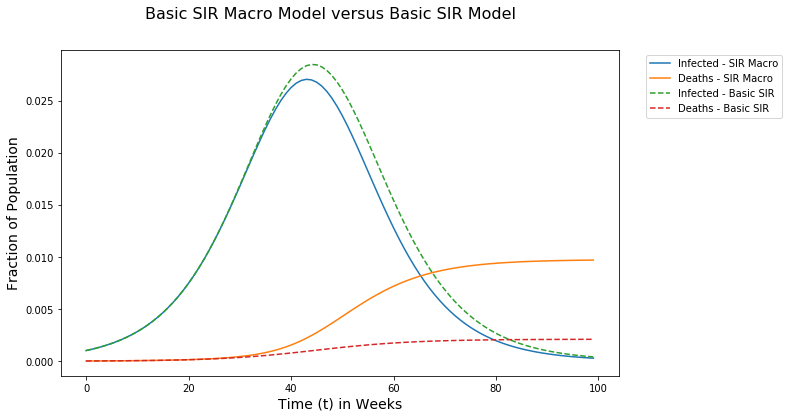

In [38]:
fig = plt.figure(figsize = (10,6))
plt.plot(result[:, 1], label = "Infected - SIR Macro")
plt.plot(result[:, 3], label = "Deaths - SIR Macro")
plt.plot(SIRD_sim_basic[:, 1], ls = '--', label = "Infected - Basic SIR")
plt.plot(SIRD_sim_basic[:, 3], ls = '--', label = "Deaths - Basic SIR")
plt.suptitle("Basic SIR Macro Model versus Basic SIR Model", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

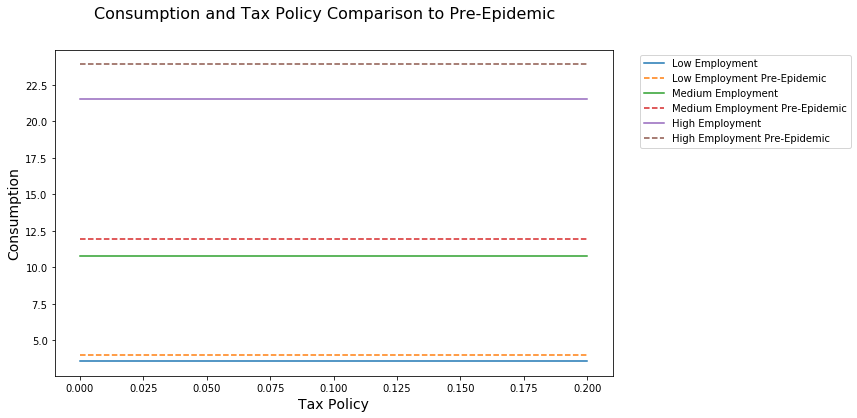

In [39]:
plt.figure(figsize = (10,6))
plt.plot(mu_grid, consumption_s[0,:].T, label = "Low Employment")
plt.plot(mu_grid, consumption_base[0,:].T, ls = '--', label = "Low Employment Pre-Epidemic")
plt.plot(mu_grid, consumption_s[1,:].T, label = "Medium Employment")
plt.plot(mu_grid, consumption_base[1,:].T, ls = '--', label = "Medium Employment Pre-Epidemic")
plt.plot(mu_grid, consumption_s[2,:].T, label = "High Employment")
plt.plot(mu_grid, consumption_base[2,:].T, ls = '--', label = "High Employment Pre-Epidemic")
plt.suptitle("Consumption and Tax Policy Comparison to Pre-Epidemic", fontsize = 16)
plt.ylabel("Consumption", fontsize = 14)
plt.xlabel("Tax Policy", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

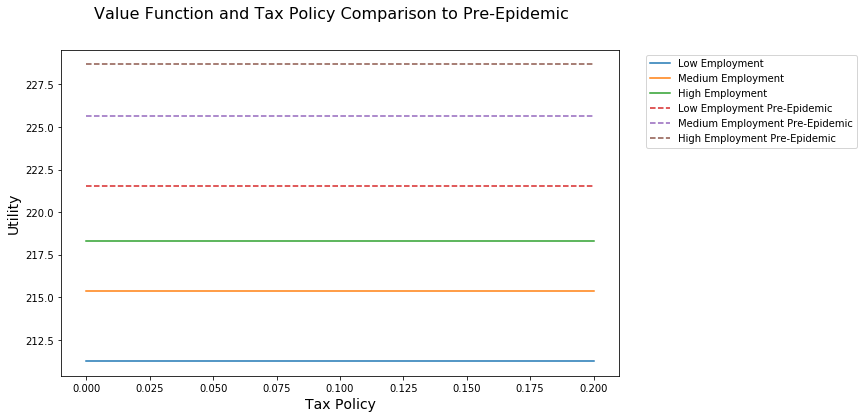

In [40]:
plt.figure(figsize = (10,6))
plt.plot(mu_grid, V_s[T-1,0,:].T, label = "Low Employment")
plt.plot(mu_grid, V_s[T-1,1,:].T, label = "Medium Employment")
plt.plot(mu_grid, V_s[T-1,2,:].T, label = "High Employment")
plt.plot(mu_grid, V_base[T-1,0,:].T, ls = '--', label = "Low Employment Pre-Epidemic")
plt.plot(mu_grid, V_base[T-1,1,:].T, ls = '--', label = "Medium Employment Pre-Epidemic")
plt.plot(mu_grid, V_base[T-1,2,:].T, ls = '--', label = "High Employment Pre-Epidemic")
plt.suptitle("Value Function and Tax Policy Comparison to Pre-Epidemic", fontsize = 16)
plt.ylabel("Utility", fontsize = 14)
plt.xlabel("Tax Policy", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

The above two figures illustrate that the pandemic has a negative effect on susceptible individuals consumption and value function. That is, susceptible people reduced their consumption in order to reduce the probabilty of becoming infected. Infected and recovered groups cannot be compared to pre-pandemic levels becuase those groups only existed in the pandemic state.

### Productivity Comparison $\phi_s < 1$ Versus $\phi_s = 1$

In [41]:
#make a grid for different levels of employment for susceptible
n_g_s = 3 
n_grid_s = np.array([0.1, 0.3, 0.6])
M = np.array([[0.8, 0.15, 0.05], [0.1, 0.8, 0.1], [0.05, 0.15, 0.8]])

#make a grid for different levels of employment for infected
n_g_i = 3 
n_grid_i = np.array([0.1, 0.3, 0.6])


#make a grid for different levels of employment for recovered
n_g_r = 3 
n_grid_r = np.array([0.1, 0.3, 0.6])

In [42]:
T = 100

pi_1 = 7.8408*(10**(-8))
pi_2 = 1.2442*(10**(-4))
pi_3 = 0.5
pi_d0 = (7*0.005)/18
kappa = 0.9


ini_dist = SIRD
n = len(ini_dist)
result = np.zeros((T,n))

phi_i = 0.8
phi_s = 1
phi_r = 1

pi_d = np.zeros(T)
pi_d[0] = pi_d0

V_s_1 = np.zeros((T, n_g_s, mu_n))
V_i = np.zeros((T, n_g_i, mu_n))
V_r = np.zeros((T, n_g_r, mu_n))
#policy = np.zeros((n_g, mu_n))

consumption_s_1 = np.zeros((n_g, mu_n))
consumption_i = np.zeros((n_g, mu_n))
consumption_r = np.zeros((n_g, mu_n))
consumption = np.zeros((n_g, mu_n))


for i in range(T-1):
    for j in range(n_g):
        for m in range(mu_n):
            V_s_1[i + 1, j, m] = -1e10
            V_i[i + 1, j, m] = -1e10
            V_r[i + 1, j, m] = -1e10
            for m_p in range(mu_n):
                result[0,:] = ini_dist
                c_s = C(A, n_grid_s[j])*phi_s
                tmp_s = u(c_s, n_grid_s[j]) + beta * ((1-result[i,0])*np.dot(M[j, :], V_s_1[i,:, m_p]) + result[i,0]*np.dot(M[j, :], V_i[i,:, m_p]))
                c_i = C(A, n_grid_s[j])*phi_i
                tmp_i = u(c_i, n_grid_i[j]) + beta *((1-pi_r-pi_d[i])*np.dot(M[j, :], V_i[i,:, m_p]) + pi_r*np.dot(M[j, :], V_r[i,:, m_p]))
                c_r = C(A, n_grid_r[j])*phi_r
                tmp_r = u(c_r, n_grid_r[j]) + beta*np.dot(M[j, :], V_r[i,:, m_p])
                
                
            if (tmp_s > V_s_1[i+1, j, m]):
                V_s_1[i + 1, j, m] = tmp_s
                #policy[j, m] = mu_grid[m_p]
                consumption_s_1[j, m] = C(A, n_grid_s[j])*phi_s
                
            if (tmp_i > V_i[i+1, j, m]):
                V_i[i + 1, j, m] = tmp_i
                #policy[j, m] = mu_grid[m_p]
                consumption_i[j, m] = C(A, n_grid_i[j])*phi_i
                
            if (tmp_r > V_r[i+1, j, m]):
                V_r[i + 1, j, m] = tmp_r
                #policy[j, m] = mu_grid[m_p]
                consumption_r[j, m] = C(A, n_grid_r[j])*phi_r
                
            consumption[j,m] = consumption_s_1[j, m] + consumption_i[j, m] + consumption_r[j, m]
            
            P = np.array([[1-(pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1]), pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1], 0, 0], [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],[0,0, 1, 0], [0,0,0,1]])
            result[i+1, :] = result[i,:] @ P
            pi_d[i+1] = pi_d[i] + kappa*(result[i,1])**2

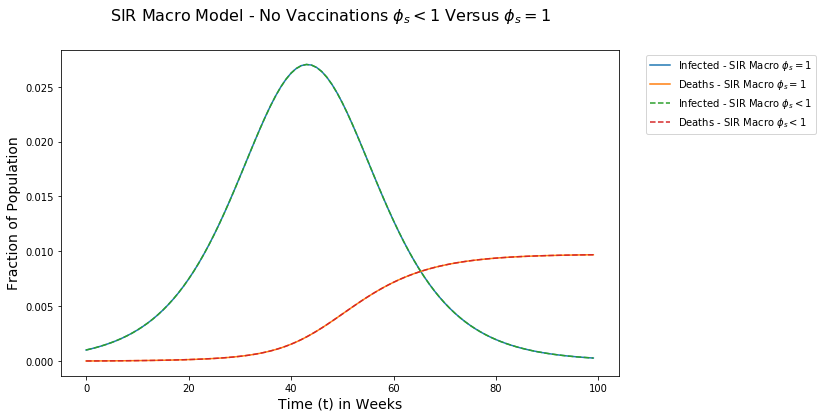

In [43]:
fig = plt.figure(figsize = (10,6))
plt.plot(result[:, 1], label = r"Infected - SIR Macro $ \phi_s = 1 $")
plt.plot(result[:, 3], label = r"Deaths - SIR Macro $ \phi_s = 1 $")
plt.plot(result_sir_macro_base[:, 1], ls = '--', label = r"Infected - SIR Macro $ \phi_s < 1 $")
plt.plot(result_sir_macro_base[:, 3], ls = '--', label = r"Deaths - SIR Macro $ \phi_s < 1 $")
plt.suptitle(r"SIR Macro Model - No Vaccinations $ \phi_s < 1$ Versus $ \phi_s = 1 $", fontsize = 16)
plt.ylabel("Fraction of Population", fontsize = 14)
plt.xlabel("Time (t) in Weeks", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

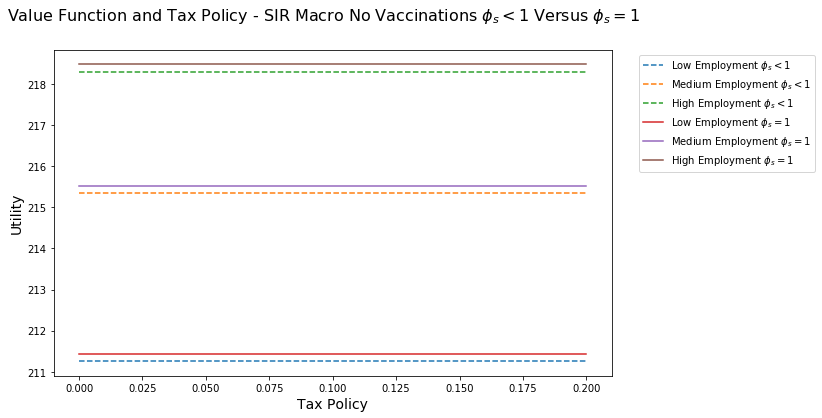

In [44]:
plt.figure(figsize = (10,6))
plt.plot(mu_grid, V_s[T-1,0,:].T, ls = '--', label = r"Low Employment $\phi_s < 1$")
plt.plot(mu_grid, V_s[T-1,1,:].T, ls = '--', label = r"Medium Employment $\phi_s < 1$")
plt.plot(mu_grid, V_s[T-1,2,:].T, ls = '--', label = r"High Employment $\phi_s < 1$")
plt.plot(mu_grid, V_s_1[T-1,0,:].T, label = r"Low Employment $ \phi_s = 1 $")
plt.plot(mu_grid, V_s_1[T-1,1,:].T, label = r"Medium Employment $\phi_s = 1$")
plt.plot(mu_grid, V_s_1[T-1,2,:].T, label = r"High Employment $\phi_s = 1$")
plt.suptitle(r"Value Function and Tax Policy - SIR Macro No Vaccinations $\phi_s < 1 $ Versus $\phi_s = 1$", fontsize = 16)
plt.ylabel("Utility", fontsize = 14)
plt.xlabel("Tax Policy", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

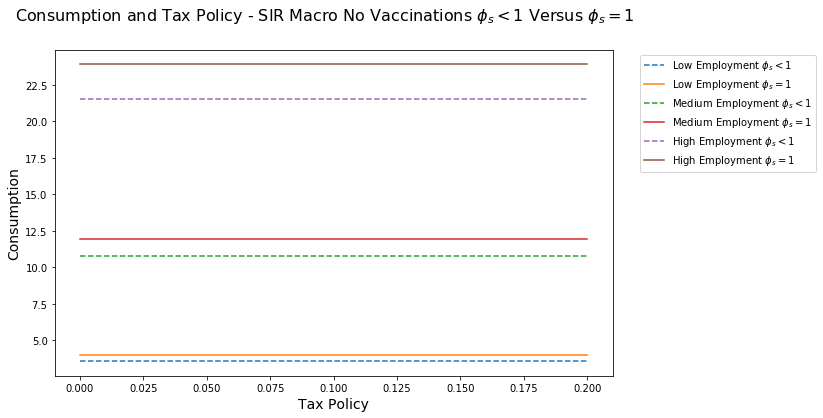

In [45]:
plt.figure(figsize = (10,6))
plt.plot(mu_grid, consumption_s[0,:].T, ls ='--', label = r"Low Employment $\phi_s < 1$")
plt.plot(mu_grid, consumption_s_1[0,:].T, label = r"Low Employment $\phi_s = 1$")
plt.plot(mu_grid, consumption_s[1,:].T, ls = '--', label = "Medium Employment $\phi_s < 1 $")
plt.plot(mu_grid, consumption_s_1[1,:].T, label = r"Medium Employment $\phi_s = 1$")
plt.plot(mu_grid, consumption_s[2,:].T, ls = '--', label = r"High Employment $\phi_s < 1$")
plt.plot(mu_grid, consumption_s_1[2,:].T, label = r"High Employment $\phi_s = 1$")
plt.suptitle(r"Consumption and Tax Policy - SIR Macro No Vaccinations $\phi_s < 1 $ Versus $\phi_s = 1$", fontsize = 16)
plt.ylabel("Consumption", fontsize = 14)
plt.xlabel("Tax Policy", fontsize = 14)
plt.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

From above we can see that changing $\phi_s$ does not affect the number of deaths or infections in the SIR macro model but it does impact consumption and the value function. There is a greater effect of worker productivity on consumption for higher levels of employment than for lower levels of employment. However, across the employment groups consumption increases when $\phi_s = 1$ (versus the case when $\phi_s < 1$). It is clear that in a pandemic where susceptible individuals are less productive their consumption declines for all levels of employment but by a greater margin for higher employment states. This effect was not captured in the <strong data-cite="eichenbaum2020">Eichenbaum, Rebelo, and Trabandt, 2020</strong> model. The effect is not as pronounced in the value functions becuase the discount present value of utility of not getting infected (i.e. $1 - \tau_t$ probability of remaining susceptible next period) is being taken into consideration when calculating the value function.

## SIR Macro Model - Vaccinations 3.1

This is the same model as above except that we are now taking the effect of vaccines on the probability of transmitting the virus such that: 

$$\pi_{k,t+1} = \pi_{k,t} - \nu S_t$$ for $k={1,2,3}$ at time $t \geq t^*$.

In [46]:
#make a grid for different levels of employment for susceptible
n_g_s = 3 
n_grid_s = np.array([0.1, 0.3, 0.6])
M = np.array([[0.8, 0.15, 0.05], [0.1, 0.8, 0.1], [0.05, 0.15, 0.8]])

#make a grid for different levels of employment for infected
n_g_i = 3 
n_grid_i = np.array([0.1, 0.3, 0.6])


#make a grid for different levels of employment for recovered
n_g_r = 3 
n_grid_r = np.array([0.1, 0.3, 0.6])

In [47]:
T = 100
t = 30
x = 0
v = 0.001

pi_1 = 7.8408*(10**(-8))
pi_2 = 1.2442*(10**(-4))
pi_3 = 0.5
pi_d0 = (7*0.005)/18
kappa = 0.9

pi_1t = np.zeros(T)
pi_2t = np.zeros(T)
pi_3t = np.zeros(T)
vacc = np.zeros(T)

pi_1t[0], pi_2t[0], pi_3t[0] = pi_1, pi_2, pi_3

# pi_1t, pi_2t, pi_3t = pi_1, pi_2, pi_3

ini_dist = SIRD
n = len(ini_dist)
result = np.zeros((T,n))

phi_i = 0.8
phi_s = 0.9
phi_r = 1

pi_d = np.zeros(T)
pi_d[0] = pi_d0

V_s = np.zeros((T, n_g_s, mu_n))
V_i = np.zeros((T, n_g_i, mu_n))
V_r = np.zeros((T, n_g_r, mu_n))
#policy = np.zeros((n_g, mu_n))

consumption_s = np.zeros((n_g, mu_n))
consumption_i = np.zeros((n_g, mu_n))
consumption_r = np.zeros((n_g, mu_n))
consumption = np.zeros((n_g, mu_n))


for i in range(T-1):
    for j in range(n_g):
        for m in range(mu_n):
            V_s[i + 1, j, m] = -1e10
            V_i[i + 1, j, m] = -1e10
            V_r[i + 1, j, m] = -1e10
            for m_p in range(mu_n):
                result[0,:] = ini_dist
                c_s = C(A, n_grid_s[j])*phi_s
                tmp_s = u(c_s, n_grid_s[j]) + beta * ((1-result[i,0])*np.dot(M[j, :], V_s[i,:, m_p]) + result[i,0]*np.dot(M[j, :], V_i[i,:, m_p]))
                c_i = C(A, n_grid_s[j])*phi_i
                tmp_i = u(c_i, n_grid_i[j]) + beta *((1-pi_r-pi_d[i])*np.dot(M[j, :], V_i[i,:, m_p]) + pi_r*np.dot(M[j, :], V_r[i,:, m_p]))
                c_r = C(A, n_grid_r[j])*phi_r
                tmp_r = u(c_r, n_grid_r[j]) + beta*np.dot(M[j, :], V_r[i,:, m_p])
                
                
            if (tmp_s > V_s[i+1, j, m]):
                V_s[i + 1, j, m] = tmp_s
                #policy[j, m] = mu_grid[m_p]
                consumption_s[j, m] = C(A, n_grid_s[j])*phi_s
                
            if (tmp_i > V_i[i+1, j, m]):
                V_i[i + 1, j, m] = tmp_i
                #policy[j, m] = mu_grid[m_p]
                consumption_i[j, m] = C(A, n_grid_i[j])*phi_i
                
            if (tmp_r > V_r[i+1, j, m]):
                V_r[i + 1, j, m] = tmp_r
                #policy[j, m] = mu_grid[m_p]
                consumption_r[j, m] = C(A, n_grid_r[j])*phi_r
                
            consumption[j,m] = consumption_s[j, m] + consumption_i[j, m] + consumption_r[j, m]
            
        if i < t:
            
            P = np.array([[1-(pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1]), pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1], 0, 0], [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],[0,0, 1, 0], [0,0,0,1]])
            result[i+1, :] = result[i,:] @ P
            vacc[i+1] = vacc[i]
            
            pi_1t[x+1] = pi_1t[x]
            pi_2t[x+1] = pi_2t[x]
            pi_3t[x+1] = pi_3t[x]
            
                
        else:
            
            pi_1t[x+1] = pi_1t[x]-v*result[i,0]
            pi_2t[x+1] = pi_2t[x]-v*result[i,0]
            pi_3t[x+1] = pi_3t[x]-v*result[i,0]
            
            vacc[i+1] = vacc[i] + v*result[i,0]
                
            P = np.array([[1-(pi_1t[x]*c_s*result[i,1]*c_i+pi_2t[x]*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3t[x]*result[i,1]), pi_1t[x]*c_s*result[i,1]*c_i+pi_2t[x]*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3t[x]*result[i,1], 0, 0], [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],[0,0, 1, 0], [0,0,0,1]])
            result[i+1, :] = result[i,:] @ P
                
        pi_d[i+1] = pi_d[i] + kappa*(result[i,1])**2
                

In [48]:
sir_macro_vacc_30 = result

In [49]:
T = 100
t = 30
x = 0
v = 0.001

pi_1 = 7.8408*(10**(-8))
pi_2 = 1.2442*(10**(-4))
pi_3 = 0.5
pi_d0 = (7*0.005)/18
kappa = 0.9

def SIRD_Macro_Model_Vaccination(SIRD, T, t, x, v, pi_1, pi_2, pi_3, pi_d0, pi_r, kappa):
    
    #make a grid for different levels of employment for susceptible
    n_g_s = 3 
    n_grid_s = np.array([0.1, 0.3, 0.6])
    M = np.array([[0.8, 0.15, 0.05], [0.1, 0.8, 0.1], [0.05, 0.15, 0.8]])

    #make a grid for different levels of employment for infected
    n_g_i = 3 
    n_grid_i = np.array([0.1, 0.3, 0.6])


    #make a grid for different levels of employment for recovered
    n_g_r = 3 
    n_grid_r = np.array([0.1, 0.3, 0.6])

    pi_1t = np.zeros(T)
    pi_2t = np.zeros(T)
    pi_3t = np.zeros(T)
    vacc = np.zeros(T)

    pi_1t[0], pi_2t[0], pi_3t[0] = pi_1, pi_2, pi_3

    # pi_1t, pi_2t, pi_3t = pi_1, pi_2, pi_3

    ini_dist = SIRD
    n = len(ini_dist)
    result = np.zeros((T,n))

    phi_i = 0.8
    phi_s = 0.9
    phi_r = 1

    pi_d = np.zeros(T)
    pi_d[0] = pi_d0

    V_s = np.zeros((T, n_g_s, mu_n))
    V_i = np.zeros((T, n_g_i, mu_n))
    V_r = np.zeros((T, n_g_r, mu_n))
    #policy = np.zeros((n_g, mu_n))

    consumption_s = np.zeros((n_g, mu_n))
    consumption_i = np.zeros((n_g, mu_n))
    consumption_r = np.zeros((n_g, mu_n))
    consumption = np.zeros((n_g, mu_n))


    for i in range(T-1):
        for j in range(n_g):
            for m in range(mu_n):
                V_s[i + 1, j, m] = -1e10
                V_i[i + 1, j, m] = -1e10
                V_r[i + 1, j, m] = -1e10
                for m_p in range(mu_n):
                    result[0,:] = ini_dist
                    c_s = C(A, n_grid_s[j])*phi_s
                    tmp_s = u(c_s, n_grid_s[j]) + beta * ((1-result[i,0])*np.dot(M[j, :], V_s[i,:, m_p]) + result[i,0]*np.dot(M[j, :], V_i[i,:, m_p]))
                    c_i = C(A, n_grid_s[j])*phi_i
                    tmp_i = u(c_i, n_grid_i[j]) + beta *((1-pi_r-pi_d[i])*np.dot(M[j, :], V_i[i,:, m_p]) + pi_r*np.dot(M[j, :], V_r[i,:, m_p]))
                    c_r = C(A, n_grid_r[j])*phi_r
                    tmp_r = u(c_r, n_grid_r[j]) + beta*np.dot(M[j, :], V_r[i,:, m_p])
                
                
                if (tmp_s > V_s[i+1, j, m]):
                    V_s[i + 1, j, m] = tmp_s
                    #policy[j, m] = mu_grid[m_p]
                    consumption_s[j, m] = C(A, n_grid_s[j])*phi_s
                
                if (tmp_i > V_i[i+1, j, m]):
                    V_i[i + 1, j, m] = tmp_i
                    #policy[j, m] = mu_grid[m_p]
                    consumption_i[j, m] = C(A, n_grid_i[j])*phi_i
                
                if (tmp_r > V_r[i+1, j, m]):
                    V_r[i + 1, j, m] = tmp_r
                    #policy[j, m] = mu_grid[m_p]
                    consumption_r[j, m] = C(A, n_grid_r[j])*phi_r
                
                consumption[j,m] = consumption_s[j, m] + consumption_i[j, m] + consumption_r[j, m]
            
            if i < t:
            
                P = np.array([[1-(pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1]), pi_1*c_s*result[i,1]*c_i+pi_2*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3*result[i,1], 0, 0], [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],[0,0, 1, 0], [0,0,0,1]])
                result[i+1, :] = result[i,:] @ P
                vacc[i+1] = vacc[i]
            
                pi_1t[x+1] = pi_1t[x]
                pi_2t[x+1] = pi_2t[x]
                pi_3t[x+1] = pi_3t[x]
            
                
            else:
            
                pi_1t[x+1] = pi_1t[x]-v*result[i,0]
                pi_2t[x+1] = pi_2t[x]-v*result[i,0]
                pi_3t[x+1] = pi_3t[x]-v*result[i,0]
            
                vacc[i+1] = vacc[i] + v*result[i,0]
                
                P = np.array([[1-(pi_1t[x]*c_s*result[i,1]*c_i+pi_2t[x]*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3t[x]*result[i,1]), pi_1t[x]*c_s*result[i,1]*c_i+pi_2t[x]*n_grid_s[j]*result[i,1]*n_grid_i[j]+pi_3t[x]*result[i,1], 0, 0], [0, 1-(pi_r+pi_d[i]), pi_r, pi_d[i]],[0,0, 1, 0], [0,0,0,1]])
                result[i+1, :] = result[i,:] @ P
                
            pi_d[i+1] = pi_d[i] + kappa*(result[i,1])**2
            
    return result, vacc

In [50]:
# modeling for different vaccination points
t = 10
SIRD_Macro_Model_Vaccination10 = SIRD_Macro_Model_Vaccination(SIRD, T, t, x, v, pi_1, pi_2, pi_3, pi_d0, pi_r, kappa)
t = 30
SIRD_Macro_Model_Vaccination30 = SIRD_Macro_Model_Vaccination(SIRD, T, t, x, v, pi_1, pi_2, pi_3, pi_d0, pi_r, kappa)
t = 50 
SIRD_Macro_Model_Vaccination50 = SIRD_Macro_Model_Vaccination(SIRD, T, t, x, v, pi_1, pi_2, pi_3, pi_d0, pi_r, kappa)
t = 70
SIRD_Macro_Model_Vaccination70 = SIRD_Macro_Model_Vaccination(SIRD, T, t, x, v, pi_1, pi_2, pi_3, pi_d0, pi_r, kappa)

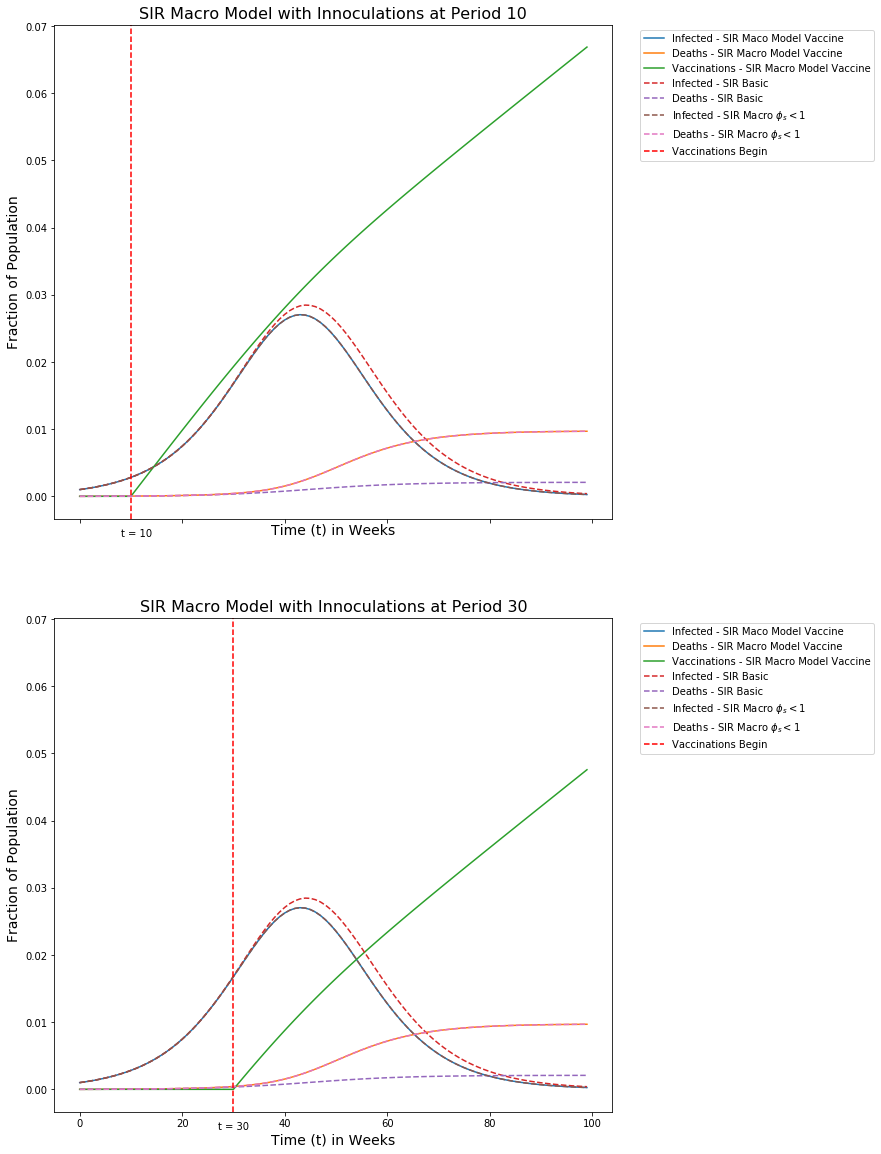

In [51]:

fig, ax = plt.subplots(2,1, sharex = True, sharey = True, figsize = (10,20))


ax[0].plot(SIRD_Macro_Model_Vaccination10[0][:, 1], label = "Infected - SIR Maco Model Vaccine")
ax[0].plot(SIRD_Macro_Model_Vaccination10[0][:, 3], label = "Deaths - SIR Macro Model Vaccine")
ax[0].plot(SIRD_Macro_Model_Vaccination10[1][:], label = "Vaccinations - SIR Macro Model Vaccine")
ax[0].plot(SIRD_sim_basic[:, 1], ls = '--', label = r"Infected - SIR Basic")
ax[0].plot(SIRD_sim_basic[:, 3], ls = '--', label = r"Deaths - SIR Basic")
ax[0].plot(result_sir_macro_base[:, 1], ls = '--', label = r"Infected - SIR Macro $ \phi_s < 1 $")
ax[0].plot(result_sir_macro_base[:, 3], ls = '--', label = r"Deaths - SIR Macro $ \phi_s < 1 $")
ax[0].text(8,-0.006, "t = 10")
ax[0].axvline(x = 10, label = "Vaccinations Begin", color = "r", ls = '--')

ax[0].set_title("SIR Macro Model with Innoculations at Period 10", fontsize = 16)
ax[0].set_ylabel("Fraction of Population", fontsize = 14)
ax[0].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[0].legend(bbox_to_anchor = (1.04,1), loc = "upper left")

ax[1].plot(SIRD_Macro_Model_Vaccination30[0][:, 1], label = "Infected - SIR Maco Model Vaccine")
ax[1].plot(SIRD_Macro_Model_Vaccination30[0][:, 3], label = "Deaths - SIR Macro Model Vaccine")
ax[1].plot(SIRD_Macro_Model_Vaccination30[1][:], label = "Vaccinations - SIR Macro Model Vaccine")
ax[1].plot(SIRD_sim_basic[:, 1], ls = '--', label = r"Infected - SIR Basic")
ax[1].plot(SIRD_sim_basic[:, 3], ls = '--', label = r"Deaths - SIR Basic")
ax[1].plot(result_sir_macro_base[:, 1], ls = '--', label = r"Infected - SIR Macro $ \phi_s < 1 $")
ax[1].plot(result_sir_macro_base[:, 3], ls = '--', label = r"Deaths - SIR Macro $ \phi_s < 1 $")
ax[1].text(27,-0.006, "t = 30")
ax[1].axvline(x = 30, label = "Vaccinations Begin", color = "r", ls = '--')

ax[1].set_title("SIR Macro Model with Innoculations at Period 30", fontsize = 16)
ax[1].set_ylabel("Fraction of Population", fontsize = 14)
ax[1].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[1].legend(bbox_to_anchor = (1.04,1), loc = "upper left")


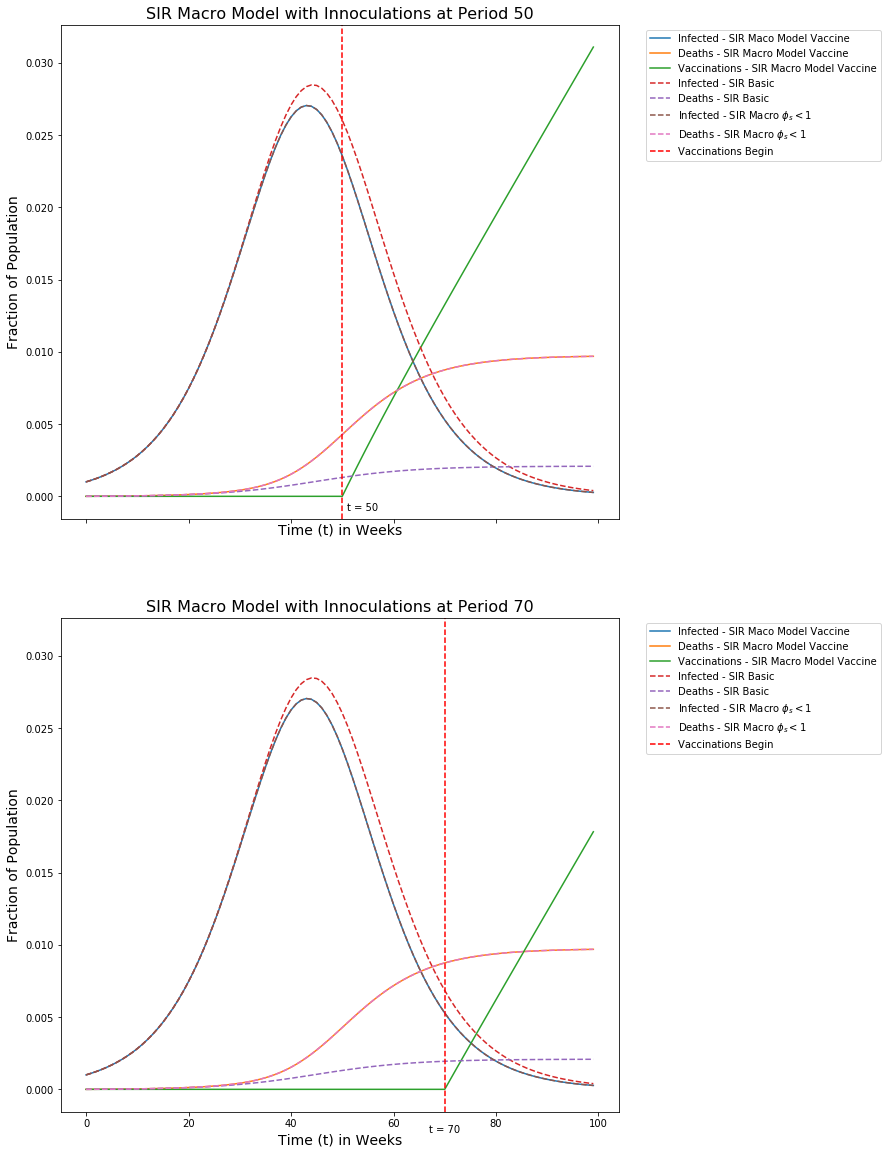

In [52]:
fig, ax = plt.subplots(2,1, sharex = True , sharey = True, figsize = (10,20))

ax[0].plot(SIRD_Macro_Model_Vaccination50[0][:, 1], label = "Infected - SIR Maco Model Vaccine")
ax[0].plot(SIRD_Macro_Model_Vaccination50[0][:, 3], label = "Deaths - SIR Macro Model Vaccine")
ax[0].plot(SIRD_Macro_Model_Vaccination50[1][:], label = "Vaccinations - SIR Macro Model Vaccine")
ax[0].plot(SIRD_sim_basic[:, 1], ls = '--', label = r"Infected - SIR Basic")
ax[0].plot(SIRD_sim_basic[:, 3], ls = '--', label = r"Deaths - SIR Basic")
ax[0].plot(result_sir_macro_base[:, 1], ls = '--', label = r"Infected - SIR Macro $ \phi_s < 1 $")
ax[0].plot(result_sir_macro_base[:, 3], ls = '--', label = r"Deaths - SIR Macro $ \phi_s < 1 $")
ax[0].text(51,-0.001, "t = 50")
ax[0].axvline(x = 50, label = "Vaccinations Begin", color = "r", ls = '--')

ax[0].set_title("SIR Macro Model with Innoculations at Period 50", fontsize = 16)
ax[0].set_ylabel("Fraction of Population", fontsize = 14)
ax[0].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[0].legend(bbox_to_anchor = (1.04,1), loc = "upper left")

ax[1].plot(SIRD_Macro_Model_Vaccination70[0][:, 1], label = "Infected - SIR Maco Model Vaccine")
ax[1].plot(SIRD_Macro_Model_Vaccination70[0][:, 3], label = "Deaths - SIR Macro Model Vaccine")
ax[1].plot(SIRD_Macro_Model_Vaccination70[1][:], label = "Vaccinations - SIR Macro Model Vaccine")
ax[1].plot(SIRD_sim_basic[:, 1], ls = '--', label = r"Infected - SIR Basic")
ax[1].plot(SIRD_sim_basic[:, 3], ls = '--', label = r"Deaths - SIR Basic")
ax[1].plot(result_sir_macro_base[:, 1], ls = '--', label = r"Infected - SIR Macro $ \phi_s < 1 $")
ax[1].plot(result_sir_macro_base[:, 3], ls = '--', label = r"Deaths - SIR Macro $ \phi_s < 1 $")
ax[1].text(67,-0.003, "t = 70")
ax[1].axvline(x = 70, label = "Vaccinations Begin", color = "r", ls = '--')

ax[1].set_title("SIR Macro Model with Innoculations at Period 70", fontsize = 16)
ax[1].set_ylabel("Fraction of Population", fontsize = 14)
ax[1].set_xlabel("Time (t) in Weeks", fontsize = 14)
ax[1].legend(bbox_to_anchor = (1.04,1), loc = "upper left")

We can see that in comparison to the baseline SIR model infections are at or below the basic SIR level for the SIR Macro Model with vaccinations. In comparison to the SIR Macro Model with no vaccinations the deaths and infections follow identical paths becuase with a vaccine the probability of transmitting the virus at work or from consumption approaches zero. Case 1) It may be the case that in both the SIR Macro Model with and without vaccinations each representative agent faces the same trade off next period as today, such that each consumer chooses their optimal consumption path indepedent of the probability of getting the virus. Case 2) with a vaccination consumers increase their consumption as they are more comfortable going out (maximize utility, etc.), but there is a negative feedback loop as increased consumption pushes up the probabilities of contracting the virus offset the success of the vaccine. In both cases the consumption and value function paths would be the same because there is a clear one for one trade-off between increasing utility by consuming more and by decreasing utility through increasing  probability of infection via consumption (i.e. If I consume more today I am increasing my risk of exposure to the virus).  

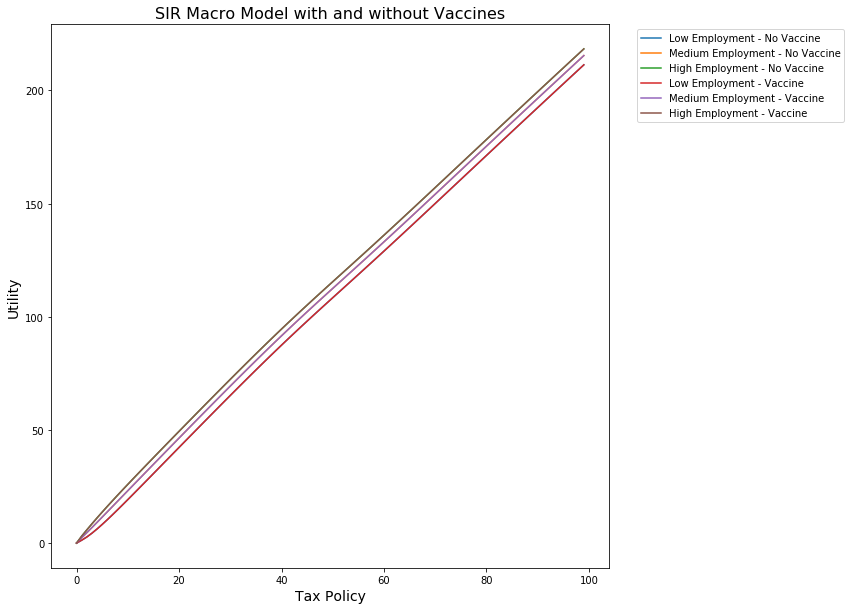

In [53]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(V_s_no_vacc[:,0,0], label = "Low Employment - No Vaccine")
ax.plot(V_s_no_vacc[:,1,0], label = "Medium Employment - No Vaccine")
ax.plot(V_s_no_vacc[:,2,0], label = "High Employment - No Vaccine")
ax.plot(V_s[:,0,0], label = "Low Employment - Vaccine")
ax.plot(V_s[:,1,0], label = "Medium Employment - Vaccine")
ax.plot(V_s[:,2,0], label = "High Employment - Vaccine")
ax.set_title("SIR Macro Model with and without Vaccines", fontsize = 16)
ax.set_ylabel("Utility", fontsize = 14)
ax.set_xlabel("Tax Policy", fontsize = 14)
ax.legend(bbox_to_anchor = (1.04,1), loc = "upper left")
plt.show()

As shown in the graph above the value function with and without vaccines is identicle. This is because consumers optimize consumption given the trade-off between infection and increased consumption (i.e. there is no net effect from the vaccine on the value function). Optimal consumption would not change either between the models because the production function is linear. 

## Basic Reproduction Number $R_0$ 3.2

The models basic reproduction number for both the basic SIR and the SIR Macro Model tells us how many infections are caused by one infected person in their lifetime in a population where everyone is susceptible to the virus $S_t = 1$. 

The average infection rate $\gamma$ is given by the ratio of the number of newly infected people to the number of infected people $ \frac{T_0}{I_0}$. As in <strong data-cite="eichenbaum2020">Eichenbaum, Rebelo, and Trabandt, 2020</strong> the expected number of infections caused by a single infection is: 

$$ \gamma + (1 - \pi_r - \pi_d)\gamma+ (1-\pi_r-\pi_d)^2\gamma + \cdots = \frac{\gamma}{\pi_r + \pi_d}$$

In [54]:
pi_1 = 7.8408*(10**(-8))
pi_2 = 1.2442*(10**(-4))
pi_3 = 0.5
pi_d0 = (7*0.005)/18
gamma = pi_3*epsilon / epsilon
R_0 = gamma/(pi_r+pi_d0)
print("The basic reproduction number for the basic SIR model is", R_0)

The basic reproduction number for the basic SIR model is 1.2857142857142856


In [55]:
gamma_macro = (pi_1*consumption_s[:,0]*epsilon*consumption_i[:,0]+pi_2*n_grid_s*epsilon*n_grid_i+pi_3*epsilon)/epsilon
R_0_macro = gamma_macro/(pi_r+pi_d0)
print("The basic reproduction number for the SIR macro model for each level of employment is", R_0_macro)

The basic reproduction number for the SIR macro model for each level of employment is [1.28571979 1.28576381 1.28591239]


Our models reproduction number is lower than <strong data-cite="eichenbaum2020">Eichenbaum, Rebelo, and Trabandt, 2020</strong> basic reproduction number of 1.5 and 1.45 for their SIR and benchmark SIR macro model. On December 18th, 2020 the [United Kingdom](https://www.gov.uk/guidance/the-r-number-in-the-uk) had the COVID-19 $R_0$ number between 1.1 and 1.2. This basic reproduction number is more aligned with current data than the $R_0$ in <strong data-cite="eichenbaum2020">Eichenbaum, Rebelo, and Trabandt, 2020</strong>. This means for every 10 people infected those 10 people will infect around 12 other people.

## Conclusion

As a variant of the model developed by <strong data-cite="eichenbaum2020">Eichenbaum, Rebelo, and Trabandt, 2020</strong> in **Macroeconomics of Epidemics**, I did not find an effect of vaccines on the optimal consumption path due to consumption smoothing. However, this paper did find that changing the productivity of susceptible people in a pandemic (due to mental health reasons, etc.) lowers consumption across all employment levels and has a greater effect on reducing consumption for higher income individuals. The role of deterministic vaccines in optimal consumption and decreased productivity for susceptible people was not studied in <strong data-cite="eichenbaum2020">Eichenbaum, Rebelo, and Trabandt, 2020</strong>. An area of future research, or projects, would be to solve the Ramsey problem (i.e. optimal containment (tax) policy) given existence of a vaccine at time $t$.

### Citation

>Eichenbaum, M. S., Rebelo, S., & Trabandt, M. (2020). The macroeconomics of epidemics (No. w26882). National Bureau of Economic Research.